## Getting Started


_course: quantum cyrptography for beginners
<br>date: 16 september 2022
<br>author: burton rosenberg_


### Installation

1. Please install [Anaconda](https://docs.anaconda.com/anaconda/install/).
1. The `conda` command is not available to create environments, and activate and disactivate them, and to install  packages.
1. Create a new environment, call it what you want, e.g. `qiskit`. Activate that environment. The command prompt changes to include the name of the activated environment.
1. With that environment activated, you might need to install jupyter with `conda install jupyter`.
1. Install the [qiskit package](https://qiskit.org/documentation/install.html). The qiskit packages is installed using `pip`. As per the instructions, take the option to install the visualization option.

The qiskit package allows you to write code on your host that will contact the IBM Quantum Experience to run, or simluate, your quantum circuits.


### Loading your account and listing backends

You need to enroll in the IBM Quantum Experience and get a token to access the API. Qiskit will store the token so that you only need to present the token to the qiskit library once.

The file `csc685_util.py` is a small library of defines that call the qiskit API.

- `load_or_save_IBMQ_account` returns a `provider` object, given an access token, or `None`, if the token is already stored on your host name.
- `list_backends` lists the quantum hardware or simulators that are available on your account.
- `run_quantum_circuit_on_backend` takes a circuit, a backend and the provider object, and submits the circuit to be run on the named backend.
- `wait_for_job` queries the provider for the status of the job, repeatedly until done.

I wrote these def's and you are free to improve them, or start afresh. IBM has updated there API's with new ways to interact which might be worth exploring.


In [1]:
from csc685_util import *


# your api token from IBM, first time run.
# after that None is good

#api_token = 'abcdefghijklmnopqrstuvwxyz'
api_token = None

provider = load_or_save_IBMQ_account(api_token)
list_backends(provider)

# choose your backend

backend = 'ibmq_qasm_simulator'
#backend = 'ibmq_armonk'
#backend = 'ibmq_vigo'
#backend = 'ibmq_london'

# and so forth ... chose from the results given by provider.backends()


backends available:
	ibmq_qasm_simulator, pending jobs:0
	ibmq_lima, pending jobs:479
	ibmq_belem, pending jobs:92
	ibmq_quito, pending jobs:88
	simulator_statevector, pending jobs:0
	simulator_mps, pending jobs:0
	simulator_extended_stabilizer, pending jobs:0
	simulator_stabilizer, pending jobs:0
	ibmq_manila, pending jobs:110
	ibm_nairobi, pending jobs:120
	ibm_oslo, pending jobs:300


### Creating  quantum circuit

Having run the Python code up to this point, we are prepared to create and submit a circuit. We shall implement a quantum coin toss by placing a qubit in the "plus state" $|+\rangle$ which is a superposition of the "zero state" $|0\rangle$ and the "one state" $|1\rangle$.

When measured, the zero state will measure a classical 0, and the one state will measure a classical 1. As the plus state superimposes $|0\rangle$ and $|1\rangle$ equally, the probability of either outcome is 1/2.



-------- CIRCUIT ---------
      ┌───┐┌─┐
 q23: ┤ H ├┤M├
      └───┘└╥┘
c4: 1/══════╩═
            0 
-------------------------

results: waiting for results from backend ibmq_qasm_simulator ...
Status @ 0 s: VALIDATING, est. queue position: None
results: {'0': 531, '1': 493}


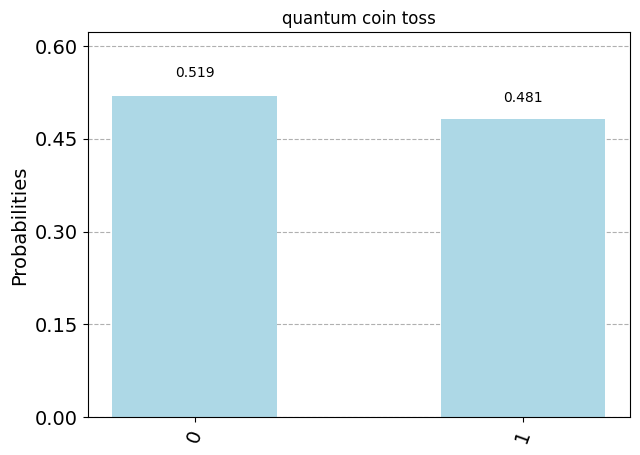

In [8]:

def make_a_plus_state():
    # make the circuit
    q = QuantumRegister(1)
    c = ClassicalRegister(1)
    quantum_circuit = QuantumCircuit(q, c)
    quantum_circuit.h(q)
    quantum_circuit.measure(q, c)
    return quantum_circuit

def draw_circuit(quantum_circuit):
    print('\n-------- CIRCUIT ---------')
    print(quantum_circuit.draw(output='text'))
    print('-------------------------\n')

    
quantum_circuit = make_a_plus_state()
draw_circuit(quantum_circuit)

print(f'results: waiting for results from backend {backend} ...')
job = run_quantum_circuit_on_backend(quantum_circuit,provider,backend)
wait_for_job(backend, job, provider)
result = job.result()


print(f'results: {result.get_counts()}')

plot_histogram(result.get_counts(), color='lightblue', title="quantum coin toss")

### End of Notebook